In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data= pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin-1')

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

1.	What are the top 10 YouTube channels based on the number of subscribers?

In [5]:
top_10_channels = data.nlargest(10, 'subscribers')[['Youtuber', 'subscribers']]
top_10_channels

,Youtuber,subscribers
0,T-Series,245000000.0
1,YouTube Movies,170000000.0
2,MrBeast,166000000.0
3,Cocomelon - Nursery Rhymes,162000000.0
4,SET India,159000000.0
5,Music,119000000.0
6,ýýý Kids Diana Show,112000000.0
7,PewDiePie,111000000.0
8,Like Nastya,106000000.0
9,Vlad and Niki,98900000.0


<ipython-input-6-c00e346ac27b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_channels, x='subscribers', y='Youtuber', palette='viridis')


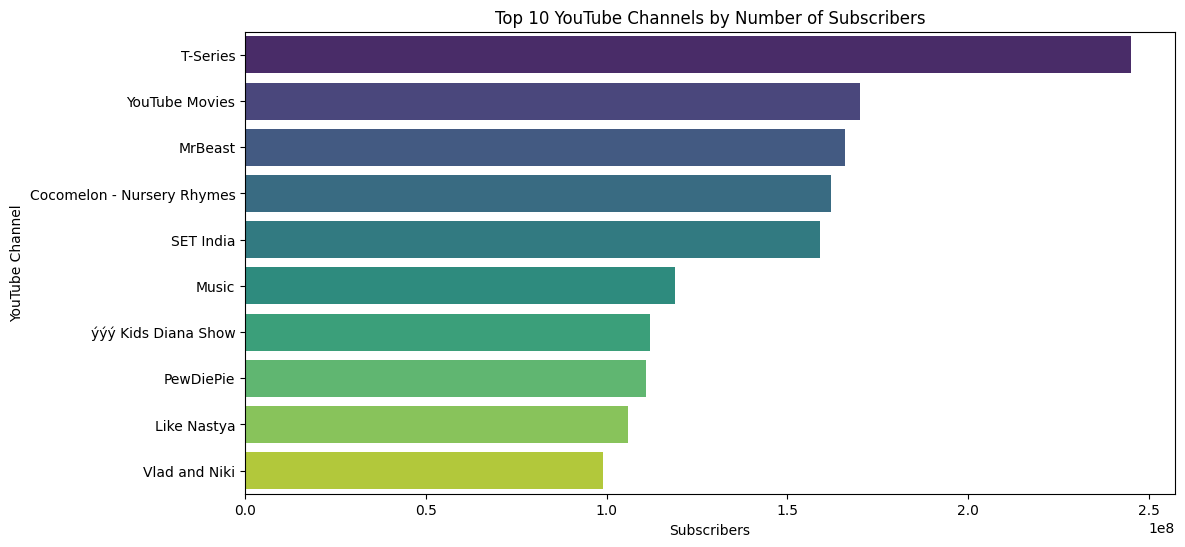

In [6]:
top_10_channels = data.nlargest(10, 'subscribers')[['Youtuber', 'subscribers']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_channels, x='subscribers', y='Youtuber', palette='viridis')
plt.title('Top 10 YouTube Channels by Number of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('YouTube Channel')
plt.show()


2.	Which category has the highest average number of subscribers?

In [7]:
category = data.groupby('category')['subscribers'].mean().idxmax()
category

'Shows'

<ipython-input-8-64c72d502bd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_subs.index, y=category_avg_subs.values, palette='viridis')


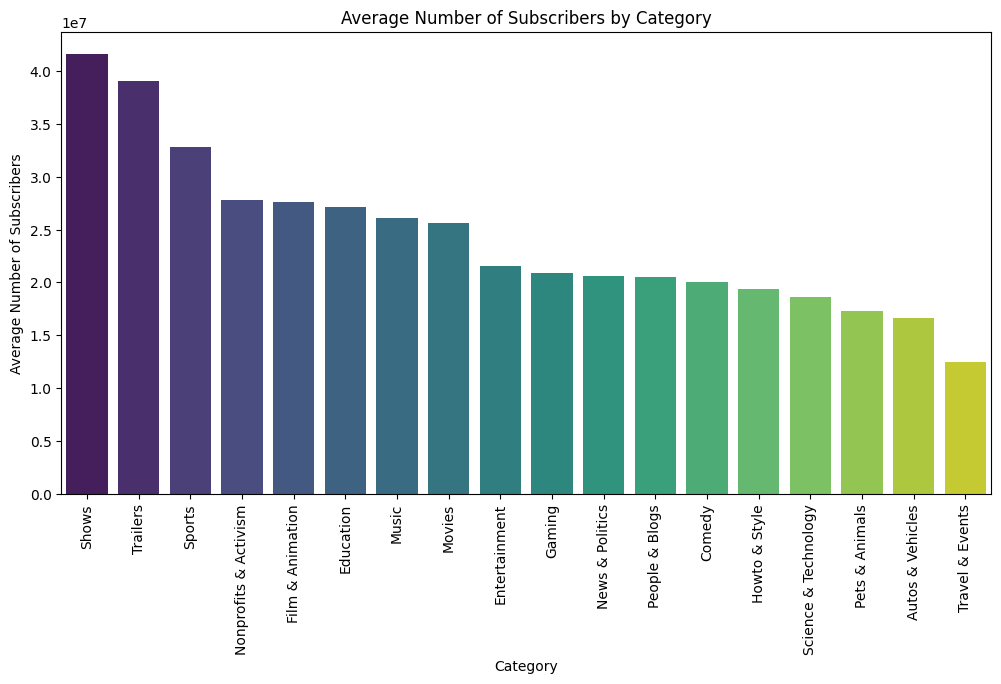

In [8]:
category_avg_subs = data.groupby('category')['subscribers'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_subs.index, y=category_avg_subs.values, palette='viridis')
plt.title('Average Number of Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Average Number of Subscribers')
plt.xticks(rotation=90)
plt.show()


3.	How many videos, on average, are uploaded by YouTube channels in each category?

In [9]:

avg = data.groupby('category')['uploads'].mean()
avg


category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment             12052.445378
Film & Animation           2861.844444
Gaming                     4285.273684
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64

<ipython-input-10-2669cbc460bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_uploads_per_category.index, y=avg_uploads_per_category.values, palette='viridis')


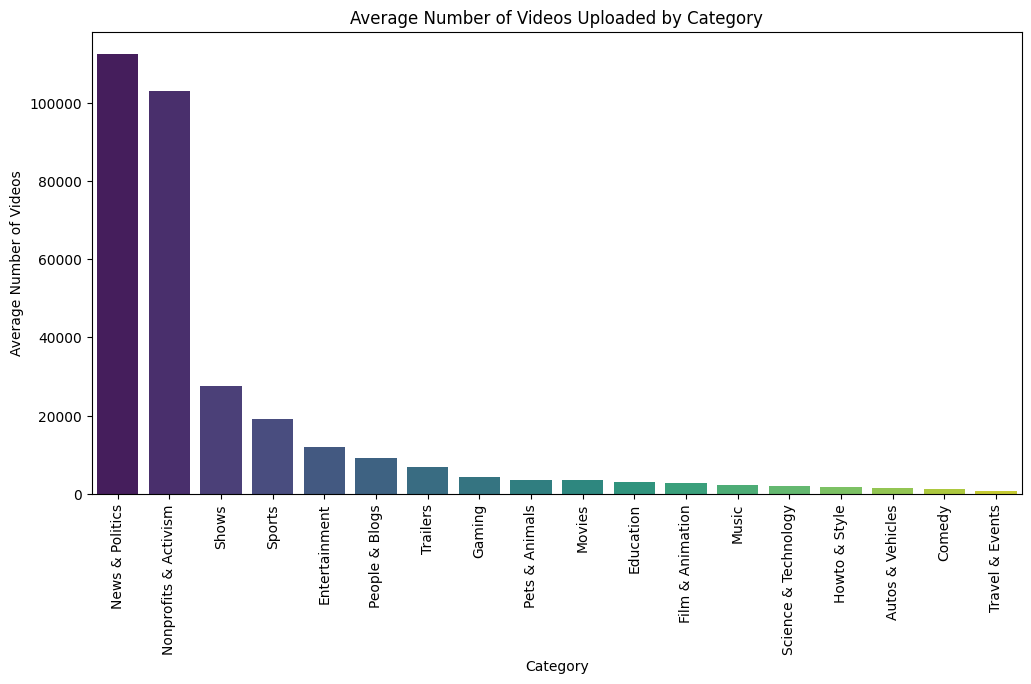

In [10]:
avg_uploads_per_category = data.groupby('category')['uploads'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_uploads_per_category.index, y=avg_uploads_per_category.values, palette='viridis')
plt.title('Average Number of Videos Uploaded by Category')
plt.xlabel('Category')
plt.ylabel('Average Number of Videos')
plt.xticks(rotation=90)
plt.show()


4.	What are the top 5 countries with the highest number of YouTube channels?

In [11]:
top_5 = data['Country'].value_counts().head(5)
top_5

Country
United States     315
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: count, dtype: int64

<ipython-input-12-62c9fb064dfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')


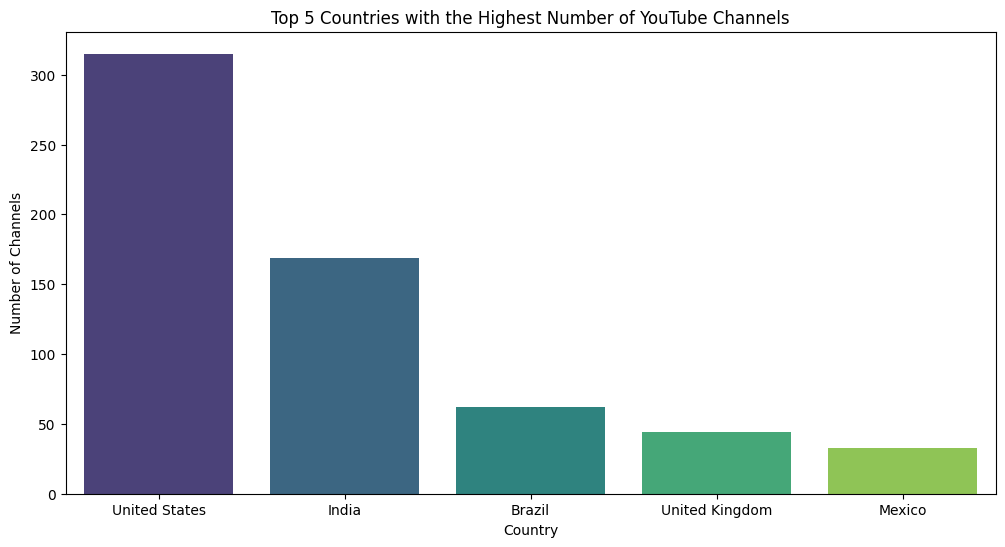

In [12]:
top_5_countries = data['Country'].value_counts().head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')
plt.title('Top 5 Countries with the Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Number of Channels')
plt.show()


5.	What is the distribution of channel types across different categories?

In [13]:
gdata = data.groupby(['category', 'channel_type'])['category'].count()
gdata

category          channel_type 
Autos & Vehicles  Autos             2
                  Entertainment     1
Comedy            Comedy           39
                  Entertainment    20
                  Film              1
                                   ..
Sports            Entertainment     1
                  Sports           11
Trailers          Entertainment     1
                  Music             1
Travel & Events   Entertainment     1
Name: category, Length: 79, dtype: int64

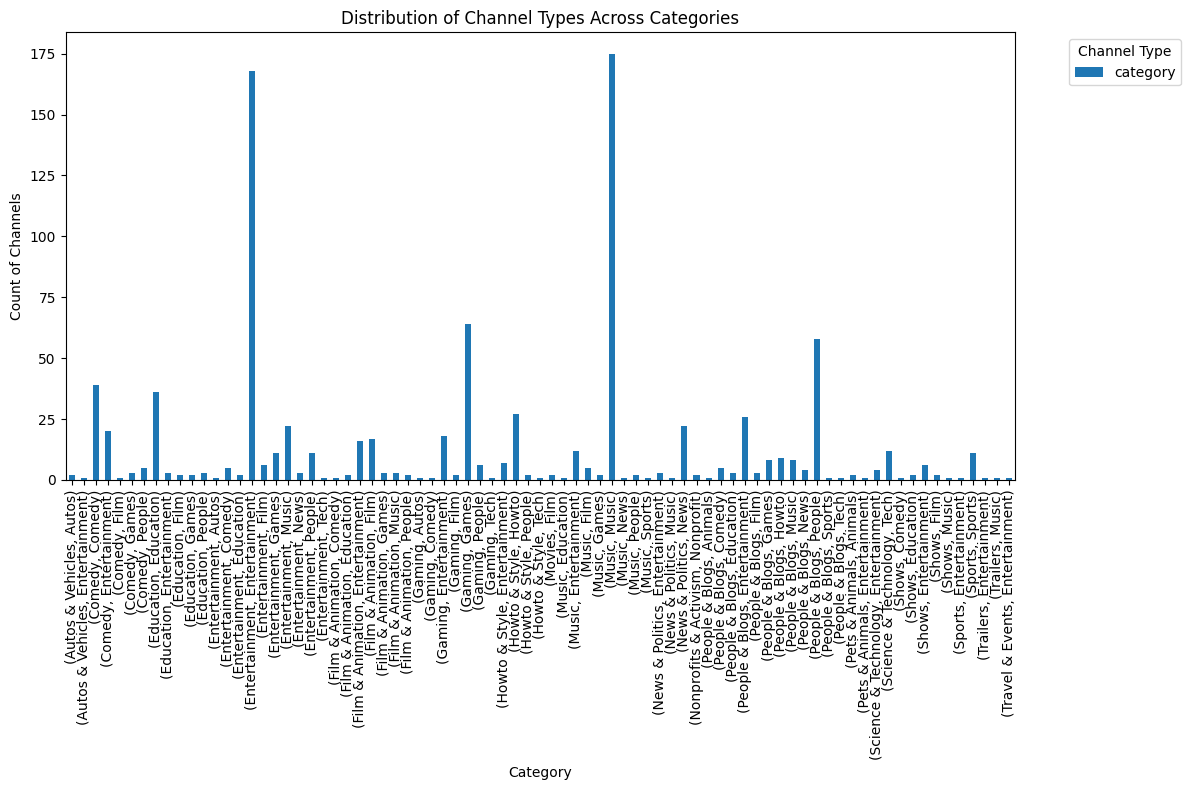

In [16]:
plt.figure(figsize=(12, 8))
gdata.plot(kind='bar', stacked=True)
plt.title('Distribution of Channel Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Count of Channels')
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

In [ ]:
correlation = data[['subscribers', 'video views']].corr()
correlation

,subscribers,video views
subscribers,1.000000,0.748179
video views,0.748179,1.000000


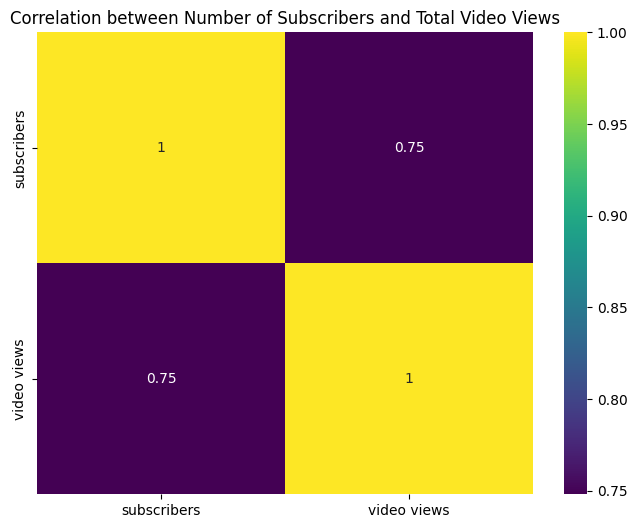

In [ ]:
correlation_subs_views = data[['subscribers', 'video views']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subs_views, annot=True, cmap='viridis')
plt.title('Correlation between Number of Subscribers and Total Video Views')
plt.show()


7.	How do the monthly earnings vary throughout different categories?

                 category  lowest_monthly_earnings  highest_monthly_earnings
286  Science & Technology                      0.0                       0.0
419         Entertainment                      0.0                       0.0
569         Entertainment                      0.0                       0.0
931         Entertainment                      0.0                       0.0
975                Comedy                      0.0                       0.0
..                    ...                      ...                       ...
3               Education                 493800.0                 7900000.0
302         Entertainment                 508100.0                 8100000.0
0                   Music                 564600.0                 9000000.0
417      Film & Animation                 576000.0                 9200000.0
495                   NaN                 850900.0                13600000.0

[1006 rows x 3 columns]


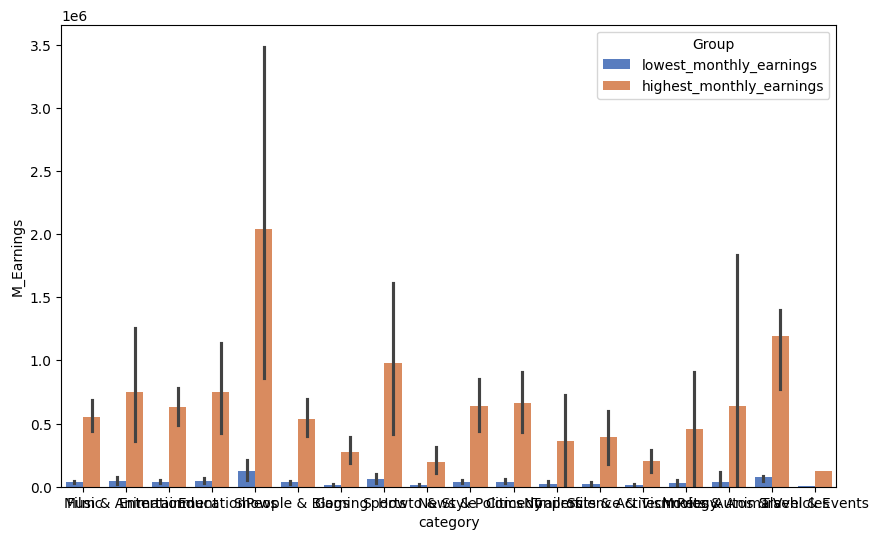

In [17]:
df = data.iloc[:, [4, 15, 16]]
df_long = df.melt(id_vars='category', var_name='Group', value_name='M_Earnings')
data7 = df.sort_values('highest_monthly_earnings')
print(data7)
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='M_Earnings', hue='Group', data=df_long, palette='muted')
plt.show()

8.	What is the overall trend in subscribers gained in the last 30 days across all channels?

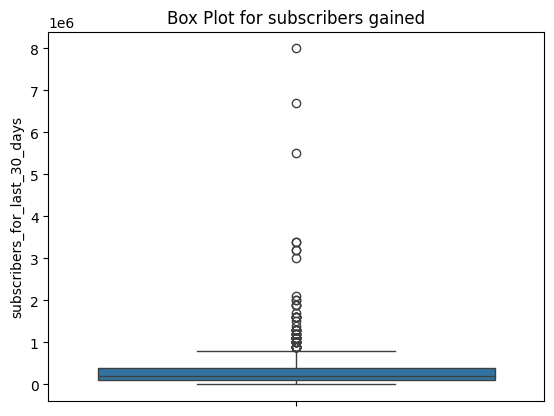

In [19]:
sns.boxplot(y='subscribers_for_last_30_days', data=data)
plt.title('Box Plot for subscribers gained')
plt.show()

9.	Are there any outliers in terms of yearly earnings from YouTube channels?

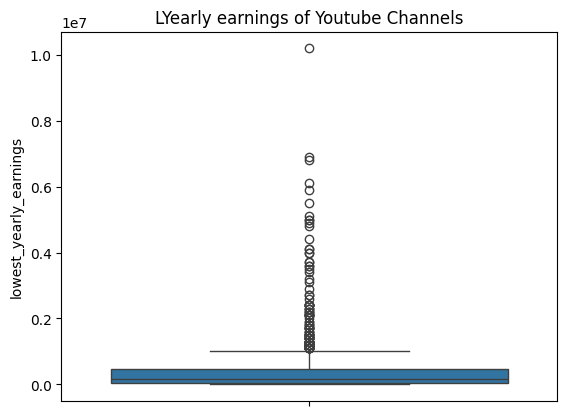

In [21]:
sns.boxplot(y='lowest_yearly_earnings', data=data)
plt.title('LYearly earnings of Youtube Channels')
plt.show()


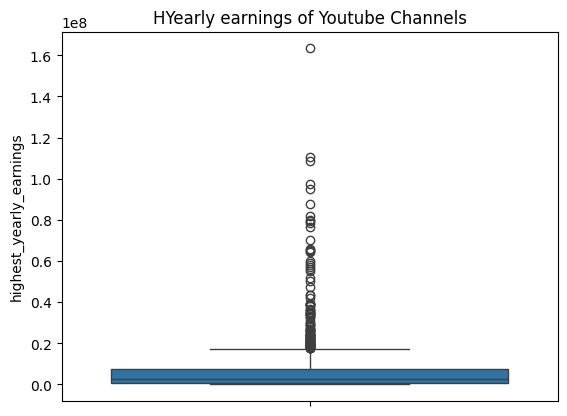

In [22]:
sns.boxplot(y='highest_yearly_earnings', data=data)
plt.title('HYearly earnings of Youtube Channels')
plt.show()

In [23]:
df9 = data.iloc[:, [1, 17]]
data9 = df9.groupby('Youtuber').sum()
print(data9.sort_values('lowest_yearly_earnings').tail(1))


                  lowest_yearly_earnings
Youtuber                                
ýýýýýýýýý KIMPRO              10200000.0


In [24]:
df9 = data.iloc[:, [1, 18]]
data9 = df9.groupby('Youtuber').sum()
print(data9.sort_values('highest_yearly_earnings').tail(1))

                  highest_yearly_earnings
Youtuber                                 
ýýýýýýýýý KIMPRO              163400000.0


10.	What is the distribution of channel creation dates? Is there any trend over time?

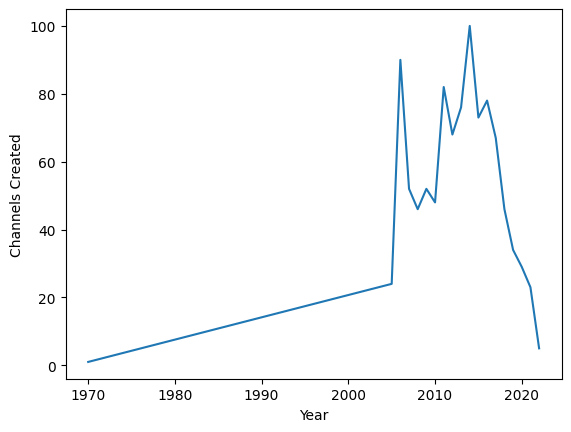

In [26]:
df10 = data.iloc[:, [20, 21]]
data10 = df10.groupby('created_year')['created_month'].count()
plt.xlabel('Year')
plt.ylabel('Channels Created')
plt.plot(data10.index, data10.values)
plt.show()


11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

Abbreviation  Youtuber                    Gross tertiary education enrollment (%)
AE            Supercar Blondie            36.8                                       2
              AlArabiya ï¿½ï¿½ï¿½ï¿½ï¿    36.8                                       1
              Noor Stars                  36.8                                       1
              ZAMZAM ELECTRONICS TRADING  36.8                                       1
              shfa show India             36.8                                       1
                                                                                    ..
VE            YOLO AVENTURAS              79.3                                       1
VN            FAPTV                       28.5                                       1
              Like Nastya VNM             28.5                                       1
              POPS Kids                   28.5                                       1
WS            DJ Khaled                   7.6   

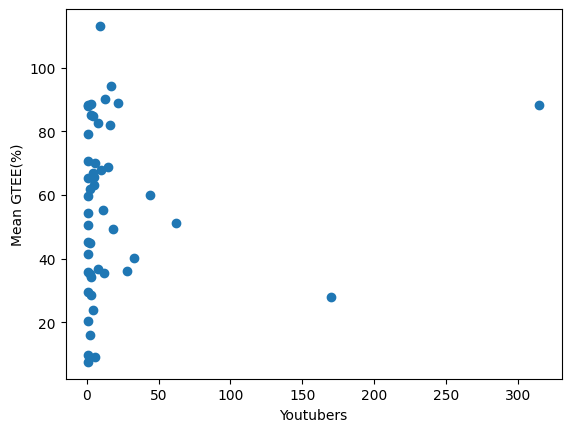

In [28]:
df11 = data.iloc[:, [1,9,23]]
data11 = df11.groupby('Abbreviation')['Gross tertiary education enrollment (%)'].mean()
data111 = df11.groupby('Abbreviation')['Youtuber'].count()
print(df11.groupby('Abbreviation').value_counts())
plt.scatter(data111.values, data11.values)
plt.ylabel('Mean GTEE(%)')
plt.xlabel('Youtubers')
plt.show()




12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

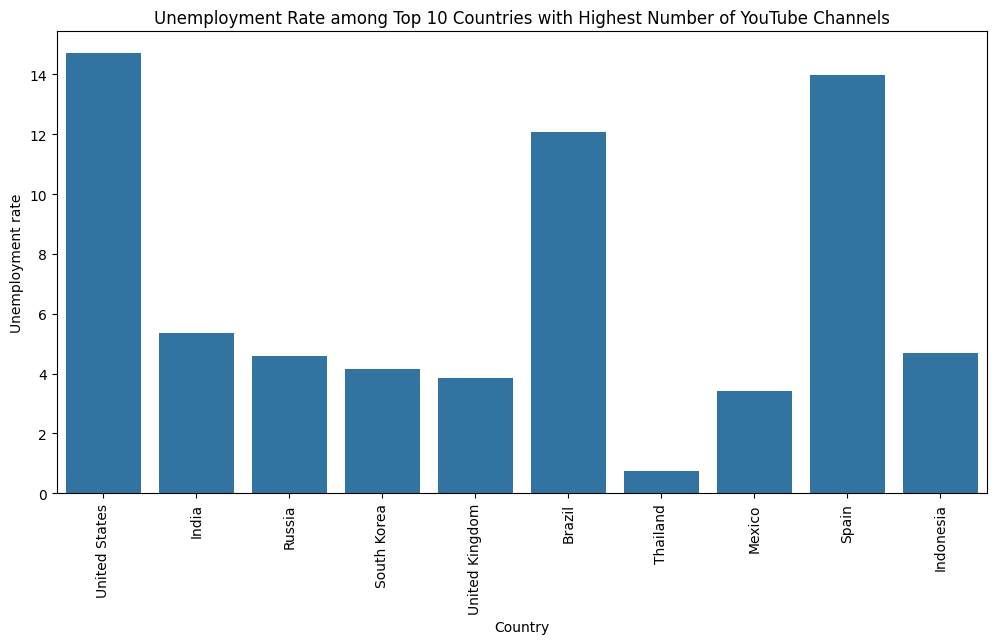

In [29]:
top_10_countries = data['Country'].value_counts().head(10).index
top_10_df = data[data['Country'].isin(top_10_countries)]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_df, x='Country', y='Unemployment rate')
plt.title('Unemployment Rate among Top 10 Countries with Highest Number of YouTube Channels')
plt.xticks(rotation=90)
plt.show()

13.	What is the average urban population percentage in countries with YouTube channels?

In [36]:
data['Urban_population'] = data['Urban_population'].fillna(0)
print(data.groupby('Country')['Urban_population'].mean())


Country
Afghanistan               9797273.0
Andorra                         0.0
Argentina                41339571.0
Australia                21844756.0
Bangladesh               60987417.0
Barbados                    89431.0
Brazil                  183241641.0
Canada                   30628482.0
Chile                    16610135.0
China                   842933962.0
Colombia                 40827302.0
Cuba                      8739135.0
Ecuador                  11116711.0
Egypt                    42895824.0
El Salvador               4694702.0
Finland                   4716888.0
France                   54123364.0
Germany                  64324835.0
India                   471031528.0
Indonesia               151509724.0
Iraq                     27783368.0
Italy                    42651966.0
Japan                   115782416.0
Jordan                    9213048.0
Kuwait                    4207083.0
Latvia                    1304943.0
Malaysia                 24475766.0
Mexico              

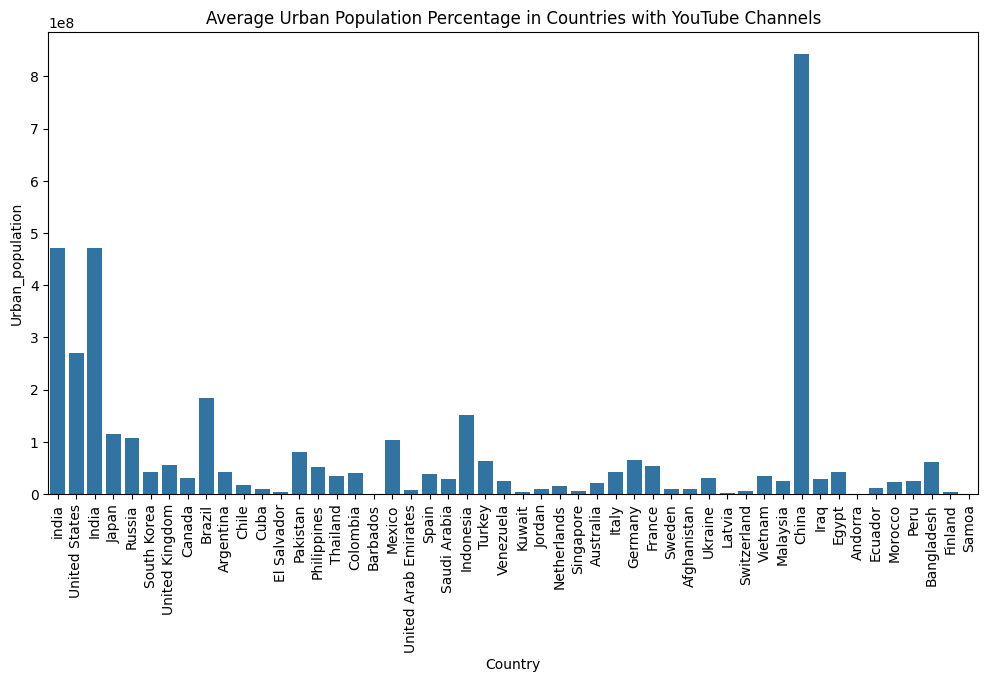

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Country', y='Urban_population')
plt.xticks(rotation=90)
plt.title('Average Urban Population Percentage in Countries with YouTube Channels')
plt.show()

14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

Latitude
-38.416097     13
-35.675147      3
-25.274398      9
-14.235004     62
-13.759029      1
-9.189967       1
-1.831239       2
-0.789275      28
 1.352083       4
 4.210484       1
 4.570868      11
 6.423750       1
 12.879721     12
 13.193887      1
 13.794185      1
 14.058324      3
 15.870032     18
 20.593684    170
 21.521757      1
 23.424076      8
 23.634501     33
 23.684994      1
 23.885942     10
 26.820553      2
 29.311660      1
 30.375321      6
 30.585164      3
 31.791702      1
 33.223191      2
 33.939110      1
 35.861660      1
 35.907757     17
 36.204824      5
 37.090240    315
 38.963745      4
 40.463667     22
 41.871940      2
 46.227638      5
 46.818188      1
 48.379433      8
 51.165691      6
 52.132633      3
 55.378051     44
 56.130366     15
 56.879635      1
 60.128161      4
 61.524010     16
 61.924110      1
Name: Youtuber, dtype: int64
Longitude
-172.104629      1
-106.346771     15
-102.552784     33
-95.712891     315
-88.896530  

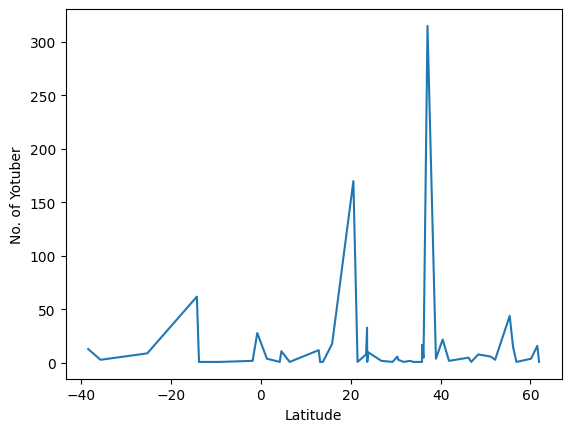

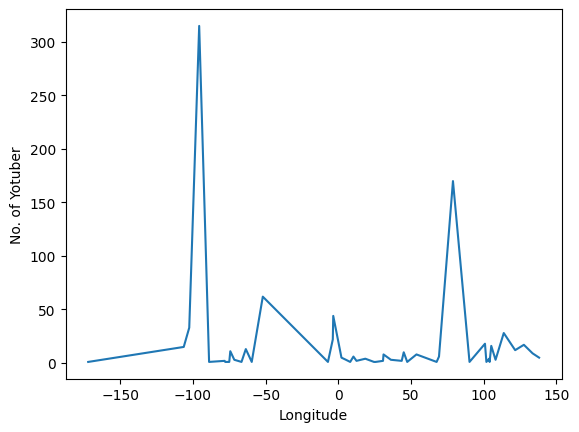

In [40]:
d = data.groupby('Latitude')['Youtuber'].count()
d1 = data.groupby('Longitude')['Youtuber'].count()
print(d)
print(d1)
plt.plot(d.index, d.values)
plt.xlabel('Latitude')
plt.ylabel('No. of Yotuber')
plt.show()
plt.plot(d1.index, d1.values)
plt.ylabel('No. of Yotuber')
plt.xlabel('Longitude')
plt.show()


15.	What is the correlation between the number of subscribers and the population of a country?

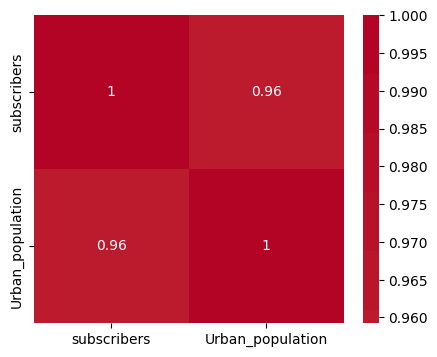

In [41]:
d= data.groupby('Country')['subscribers'].sum()
d1 = data.groupby('Country')['Urban_population'].sum()
data1 = pd.DataFrame({'subscribers': d, 'Urban_population': d1})
corr_matrix = data1.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

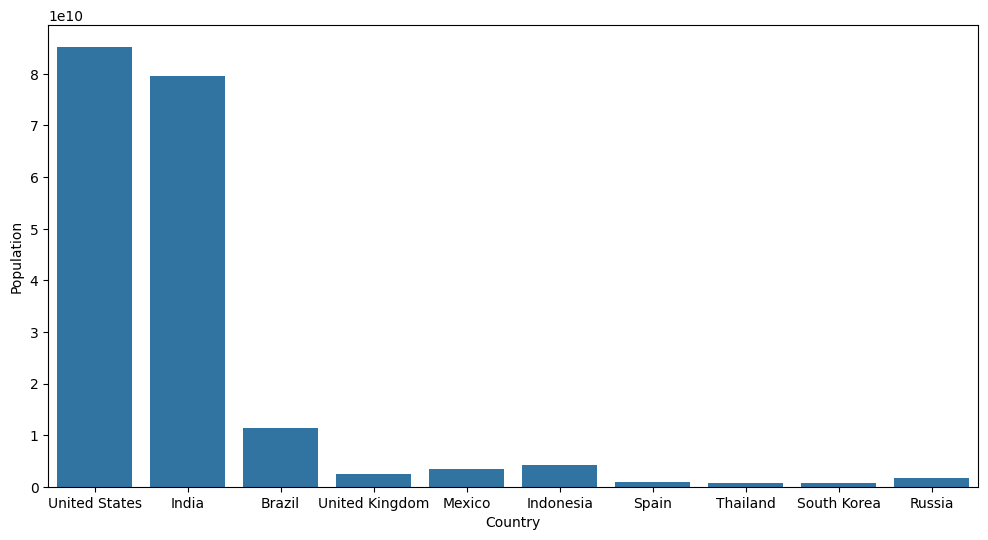

In [51]:
dd = data.groupby('Country')['Youtuber'].count()
sorted_h = dd.sort_values(ascending=False)
sorted_h = sorted_h.head(10)
indexes = sorted_h.index.tolist()
desired_n = d1.loc[indexes]
plt.figure(figsize=(12, 6))
data3 = pd.DataFrame({'Country': sorted_h.index, 'Population': desired_n})
sns.barplot(x='Country', y='Population', data=data3)
plt.show()


17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

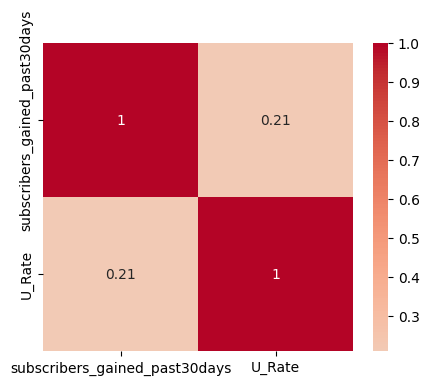

In [53]:
d = data.groupby('Country')['subscribers_for_last_30_days'].sum()
dd = data.groupby('Country')['Unemployment rate'].mean()
data17 = pd.DataFrame({'subscribers_gained_past30days': d, 'U_Rate': dd})
corr_matrix = data17.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

18.	How does the distribution of video views for the last 30 days vary across different channel types?

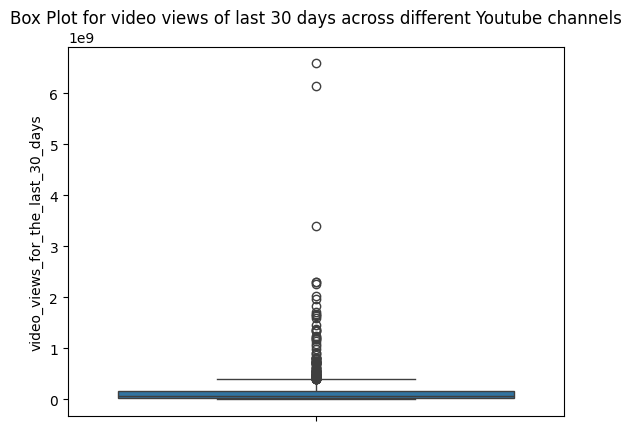

In [54]:
sns.boxplot(y='video_views_for_the_last_30_days', data=data)
plt.title('Box Plot for video views of last 30 days across different Youtube channels')
plt.show()

19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?

In [55]:
print(data.groupby('Youtuber')['video_views_for_the_last_30_days'].sum())
print(data.groupby('Youtuber')['subscribers_for_last_30_days'].sum())


Youtuber
#Refugio Mental                                6942000.0
#Refï¿½ï¿½ï¿½ï¿½                               6942000.0
123 GO! Spanish                               26519000.0
1MILLION Dance Studio                                0.0
1theK (ï¿½ï¿½ï¿½ï¿½ï                         105567000.0
                                                ...     
ýýýýýýýýýýýýýýýý - Al-Remas                  113003000.0
ýýýýýýýýýýýýýýýýýý                            90241000.0
ýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýý        20351.0
ýýýýýýýýýýýýýýýýýýýýý                          1370000.0
ýýýýýýýýýýýýýýýýýýýýýý                        68006000.0
Name: video_views_for_the_last_30_days, Length: 995, dtype: float64
Youtuber
#Refugio Mental                                   0.0
#Refï¿½ï¿½ï¿½ï¿½                                  0.0
123 GO! Spanish                              100000.0
1MILLION Dance Studio                             0.0
1theK (ï¿½ï¿½ï¿½ï¿½ï                              0.0
                 

20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [56]:
value = data['subscribers'].sum()
total_months = 12*(2024-2005)
print("The average subscribed gained is",value/total_months)



The average subscribed gained is 102037719.29824561
